#**Setup and Data Preprocessing**

In [ ]:
#Imports
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.model_selection import cross_val_score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.linear_model import LogisticRegression #Logistic Regression Model
from sklearn.neighbors import KNeighborsClassifier #KNN Model
from sklearn.ensemble import RandomForestClassifier #RF Model
from sklearn.pipeline import Pipeline # Pipepline for ML
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict

import pandas as pd
import kagglehub

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import numpy as np

Download the dataset from Kaggle.

In [ ]:
# Download latest version
path = kagglehub.dataset_download("thedevastator/cancer-patients-and-air-pollution-a-new-link")

# Show file location
print("Path to dataset files:", path)

# Load Data into a Pandas DataFrame
cancer_df = pd.read_csv(path + "/cancer patient data sets.csv")

Using Colab cache for faster access to the 'cancer-patients-and-air-pollution-a-new-link' dataset.
Path to dataset files: /kaggle/input/cancer-patients-and-air-pollution-a-new-link


Dropping unnessessary columns & converting categorical data to numerical.

In [ ]:
# Drop ID columns
cancer_df.drop(["index", "Patient Id"], axis=1, inplace=True)

# Convert 'level' to numeric
cancer_df["level_numeric"] = cancer_df["Level"].apply(           # 0 = Low, 1 = Medium, 2 = High
    lambda x: 0 if x == "Low" else (1 if x == "Medium" else 2)
)

In [ ]:
# Quick Info
cancer_df.info()
print(cancer_df["Level"].value_counts())
print(cancer_df["level_numeric"].value_counts())
cancer_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,level_numeric
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,Low,0
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,Medium,1
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,High,2
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,High,2
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,High,2


Perform Data Visualization

In [ ]:
# Create a copy of the DataFrame only with numerical features
data_num = cancer_df.copy()
data_num = data_num.drop(cancer_df.select_dtypes(include=['object']).columns.tolist(), axis=1)

# Display Correlation Matrix
corr_matrix = data_num.corr()
corr_matrix

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,level_numeric
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700,0.060048
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618,-0.164985
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343,0.636038
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694,0.718710
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844,0.713839
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916,0.673255
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831,0.701303
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375,0.609971
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677,0.706273
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422,0.827435


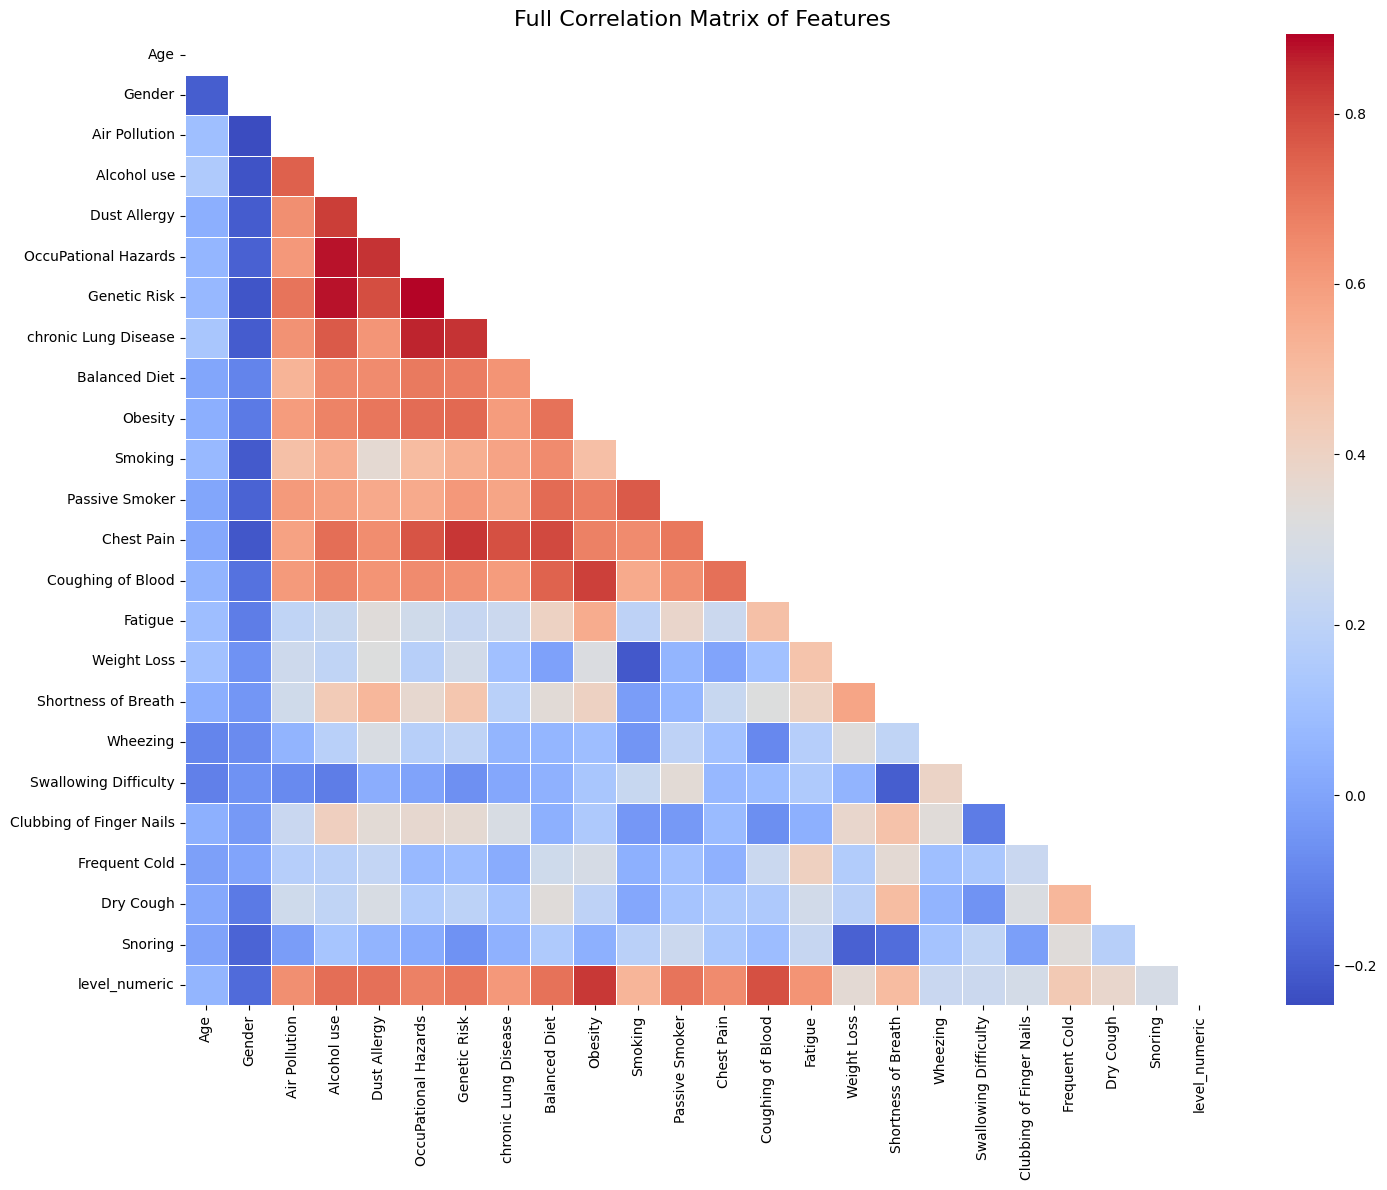

In [ ]:
# Make the Correlation Matrix prettier

mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(15, 12))
sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.5,
    fmt=".2f",
    mask=mask
)

plt.title("Full Correlation Matrix of Features", fontsize=16)
plt.tight_layout()
plt.show()

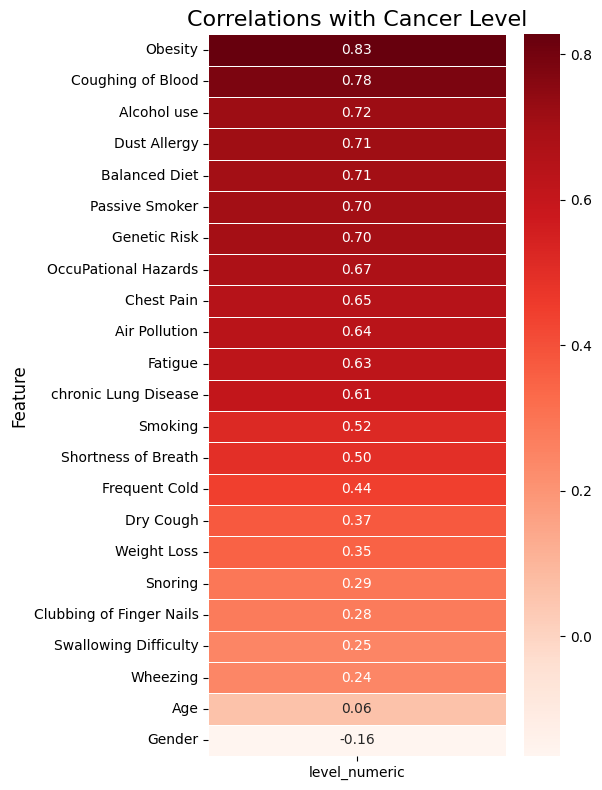

In [ ]:
# Display the Correlation of features to Cancer Level

corr_with_target = corr_matrix["level_numeric"].sort_values(ascending=False)
corr_with_target = corr_with_target.drop("level_numeric")

corr_df = corr_with_target.to_frame(name="level_numeric")

plt.figure(figsize=(6, 8))

sns.heatmap(
    corr_df,
    annot=True,          # show the numbers
    cmap="Reds",         # similar red gradient
    cbar=True,
    linewidths=0.5,
    fmt=".2f"
)

plt.title("Correlations with Cancer Level", fontsize=16)
plt.ylabel("Feature", fontsize=12)
plt.tight_layout()
plt.show()

#**Background Questions**

##**Question 1**
###Is there a correlation between dust allergy and a lung cancer diagnosis?

Text(0.5, 1.0, 'Distribution of Dust Allergy Severity')

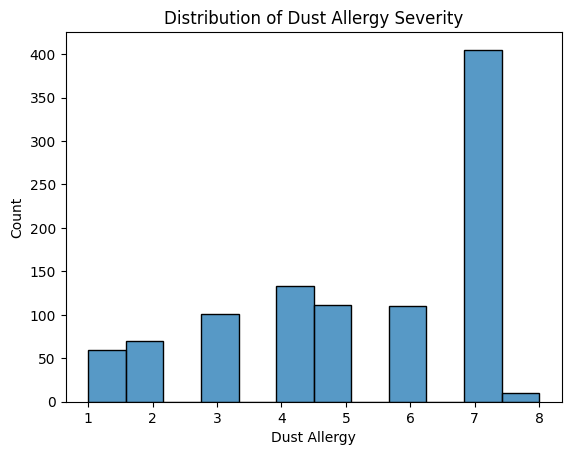

In [ ]:
#Dust Allergy Severity data distribution

sns.histplot( data = cancer_df,
           x='Dust Allergy',
            )
plt.title("Distribution of Dust Allergy Severity")

In [ ]:
rho1, pval1 = stats.spearmanr(cancer_df['level_numeric'], cancer_df['Dust Allergy'], nan_policy="omit")
print("Spearman rho:", rho1)
print("p-value:", pval1)

Spearman rho: 0.7027890683704304
p-value: 9.195762144130443e-150


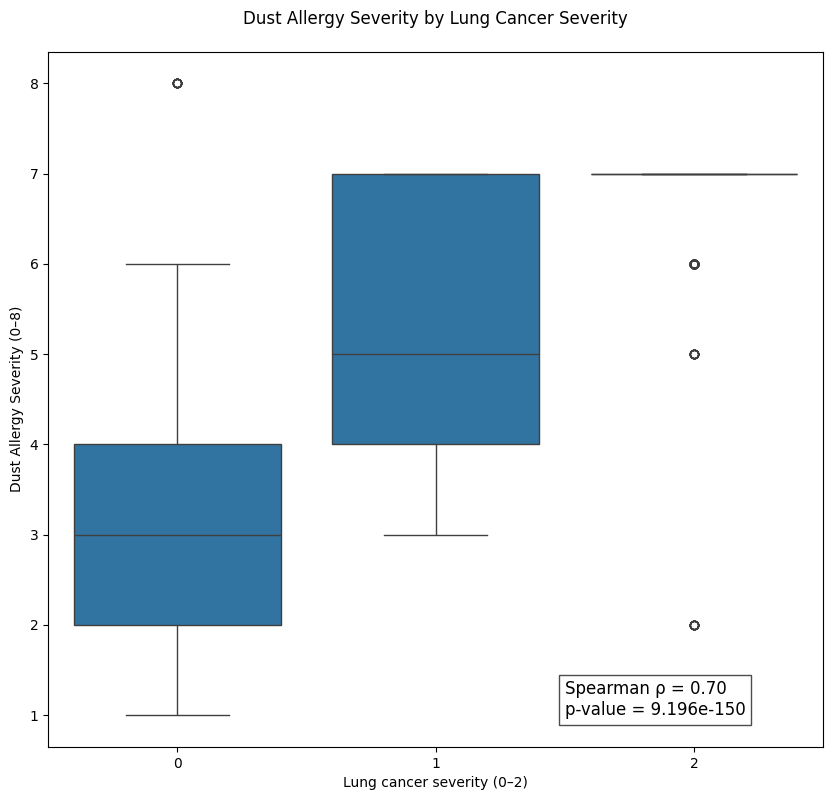

In [ ]:
#Boxplot Dust Allergy across lung cancer severity groups with Spearman annotation

plt.figure(figsize=(10,5))
plot1 = sns.boxplot(data=cancer_df, x='level_numeric', y='Dust Allergy')

#add space at top
plt.subplots_adjust(top=1.5)

plt.xlabel("Lung cancer severity (0–2)")
plt.ylabel("Dust Allergy Severity (0–8)")



plot1.text(1.5, 1,
         f"Spearman ρ = {rho1:.2f}\np-value = {pval1:.3e}",
         ha="left",
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.7))

plt.title("Dust Allergy Severity by Lung Cancer Severity", pad=20)
plt.show()

##**Question 2**
###Does excessive alcohol consumption correlate with lung cancer diagnosis?

In [ ]:
rho2, pval2 = stats.spearmanr(cancer_df['level_numeric'], cancer_df['Alcohol use'], nan_policy="omit")
print("Spearman rho:", rho2)
print("p-value:", pval2)

Spearman rho: 0.6817920056833044
p-value: 1.20591621187168e-137


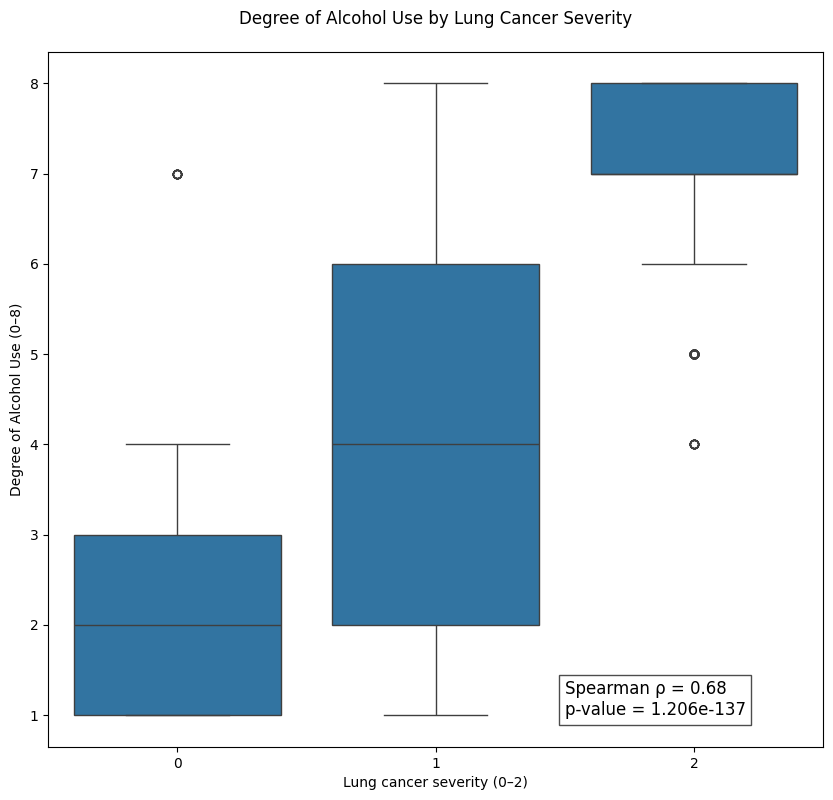

In [ ]:
plt.figure(figsize=(10,5))
plot2 = sns.boxplot(data=cancer_df, x='level_numeric', y='Alcohol use')

#add space at top
plt.subplots_adjust(top=1.5)

plt.xlabel("Lung cancer severity (0–2)")
plt.ylabel("Degree of Alcohol Use (0–8)")



plot2.text(1.5, 1,
         f"Spearman ρ = {rho2:.2f}\np-value = {pval2:.3e}",
         ha="left",
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.7))

plt.title("Degree of Alcohol Use by Lung Cancer Severity", pad=20)
plt.show()

##**Question 3**
###Do genetic predispositions correlate with lung cancer symptoms severity?

In [ ]:
rho3, pval3 = stats.spearmanr(cancer_df['level_numeric'], cancer_df['Genetic Risk'], nan_policy="omit")
print("Spearman rho:", rho3)
print("p-value:", pval3)

Spearman rho: 0.6756051906448876
p-value: 2.881432919837555e-134


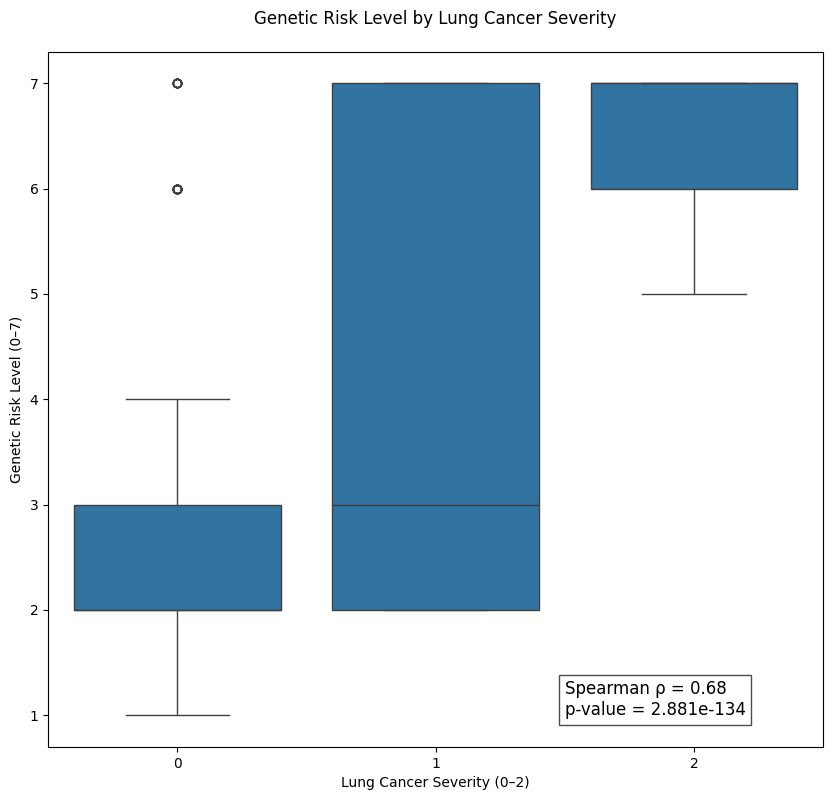

In [ ]:
plt.figure(figsize=(10,5))
plot3 = sns.boxplot(data=cancer_df, x='level_numeric', y='Genetic Risk')

#add space at top
plt.subplots_adjust(top=1.5)

plt.xlabel("Lung Cancer Severity (0–2)")
plt.ylabel("Genetic Risk Level (0–7)")



plot3.text(1.5, 1,
         f"Spearman ρ = {rho3:.2f}\np-value = {pval3:.3e}",
         ha="left",
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.7))

plt.title("Genetic Risk Level by Lung Cancer Severity", pad=20)
plt.show()

##**Question 4**
###Is there a correlation between smoking and a lung cancer diagnosis?

In [ ]:
smoking_df = cancer_df.melt(
    id_vars='level_numeric',
    value_vars=['Smoking', 'Passive Smoker'],
    var_name='Smoking Type',
    value_name='Smoking Level'
)

rho_smoking, pval_smoking = stats.spearmanr(cancer_df['level_numeric'], cancer_df['Smoking'], nan_policy='omit')
rho_passive, pval_passive = stats.spearmanr(cancer_df['level_numeric'], cancer_df['Passive Smoker'], nan_policy='omit')

print(f"Smoking: Spearman rho = {rho_smoking:.2f}, p = {pval_smoking:.3e}")
print(f"Passive Smoking: Spearman rho = {rho_passive:.2f}, p = {pval_passive:.3e}")

Smoking: Spearman rho = 0.48, p = 6.244e-60
Passive Smoking: Spearman rho = 0.68, p = 2.151e-138


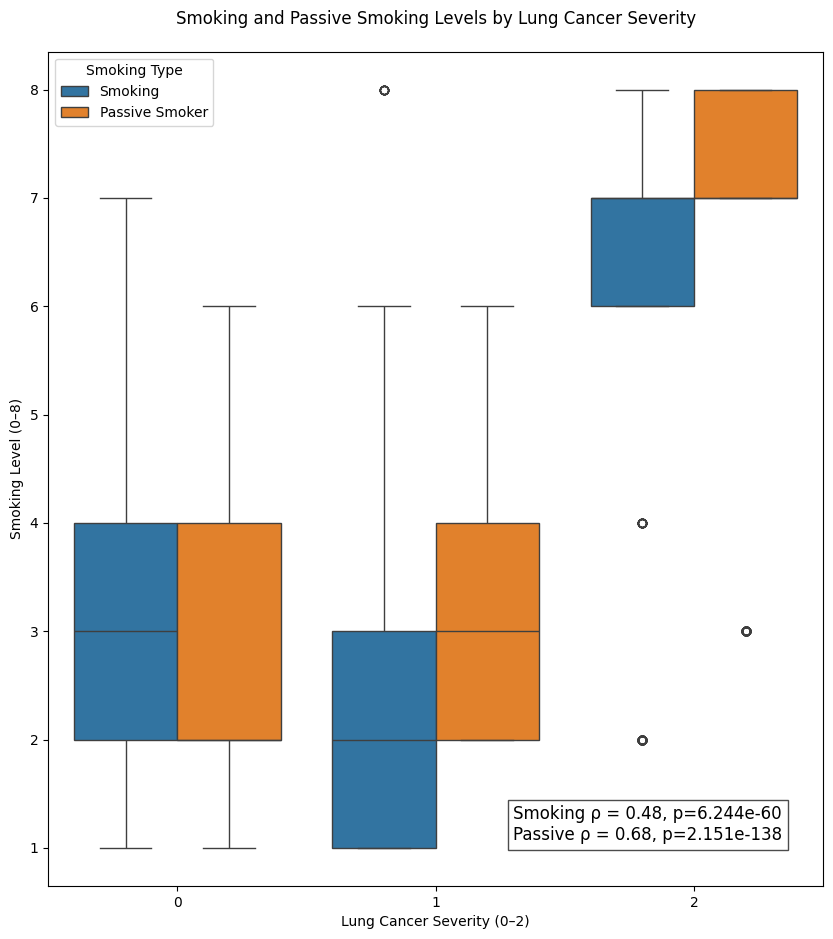

In [ ]:
plt.figure(figsize=(10,6))

plot4 = sns.boxplot(
    data=smoking_df,
    x='level_numeric',
    y='Smoking Level',
    hue='Smoking Type',    # separate boxes for Smoking / Passive Smoking
    palette=['#1f77b4', '#ff7f0e'], #set colors
)

#add space at top
plt.subplots_adjust(top=1.5)

plt.xlabel("Lung Cancer Severity (0–2)")
plt.ylabel("Smoking Level (0–8)")
plt.title("Smoking and Passive Smoking Levels by Lung Cancer Severity", pad=20)

plot4.text(0.6, 0.05,
          f"Smoking ρ = {rho_smoking:.2f}, p={pval_smoking:.3e}\nPassive ρ = {rho_passive:.2f}, p={pval_passive:.3e}",
          transform=plot4.transAxes,
          ha='left',
          va='bottom',
          fontsize=12,
          bbox=dict(facecolor='white', alpha=0.7))

# Optional: place a legend
plt.legend(title='Smoking Type', loc='upper left')

plt.show()

##**Question 5**
### Do risk factors differ between younger and older patients?

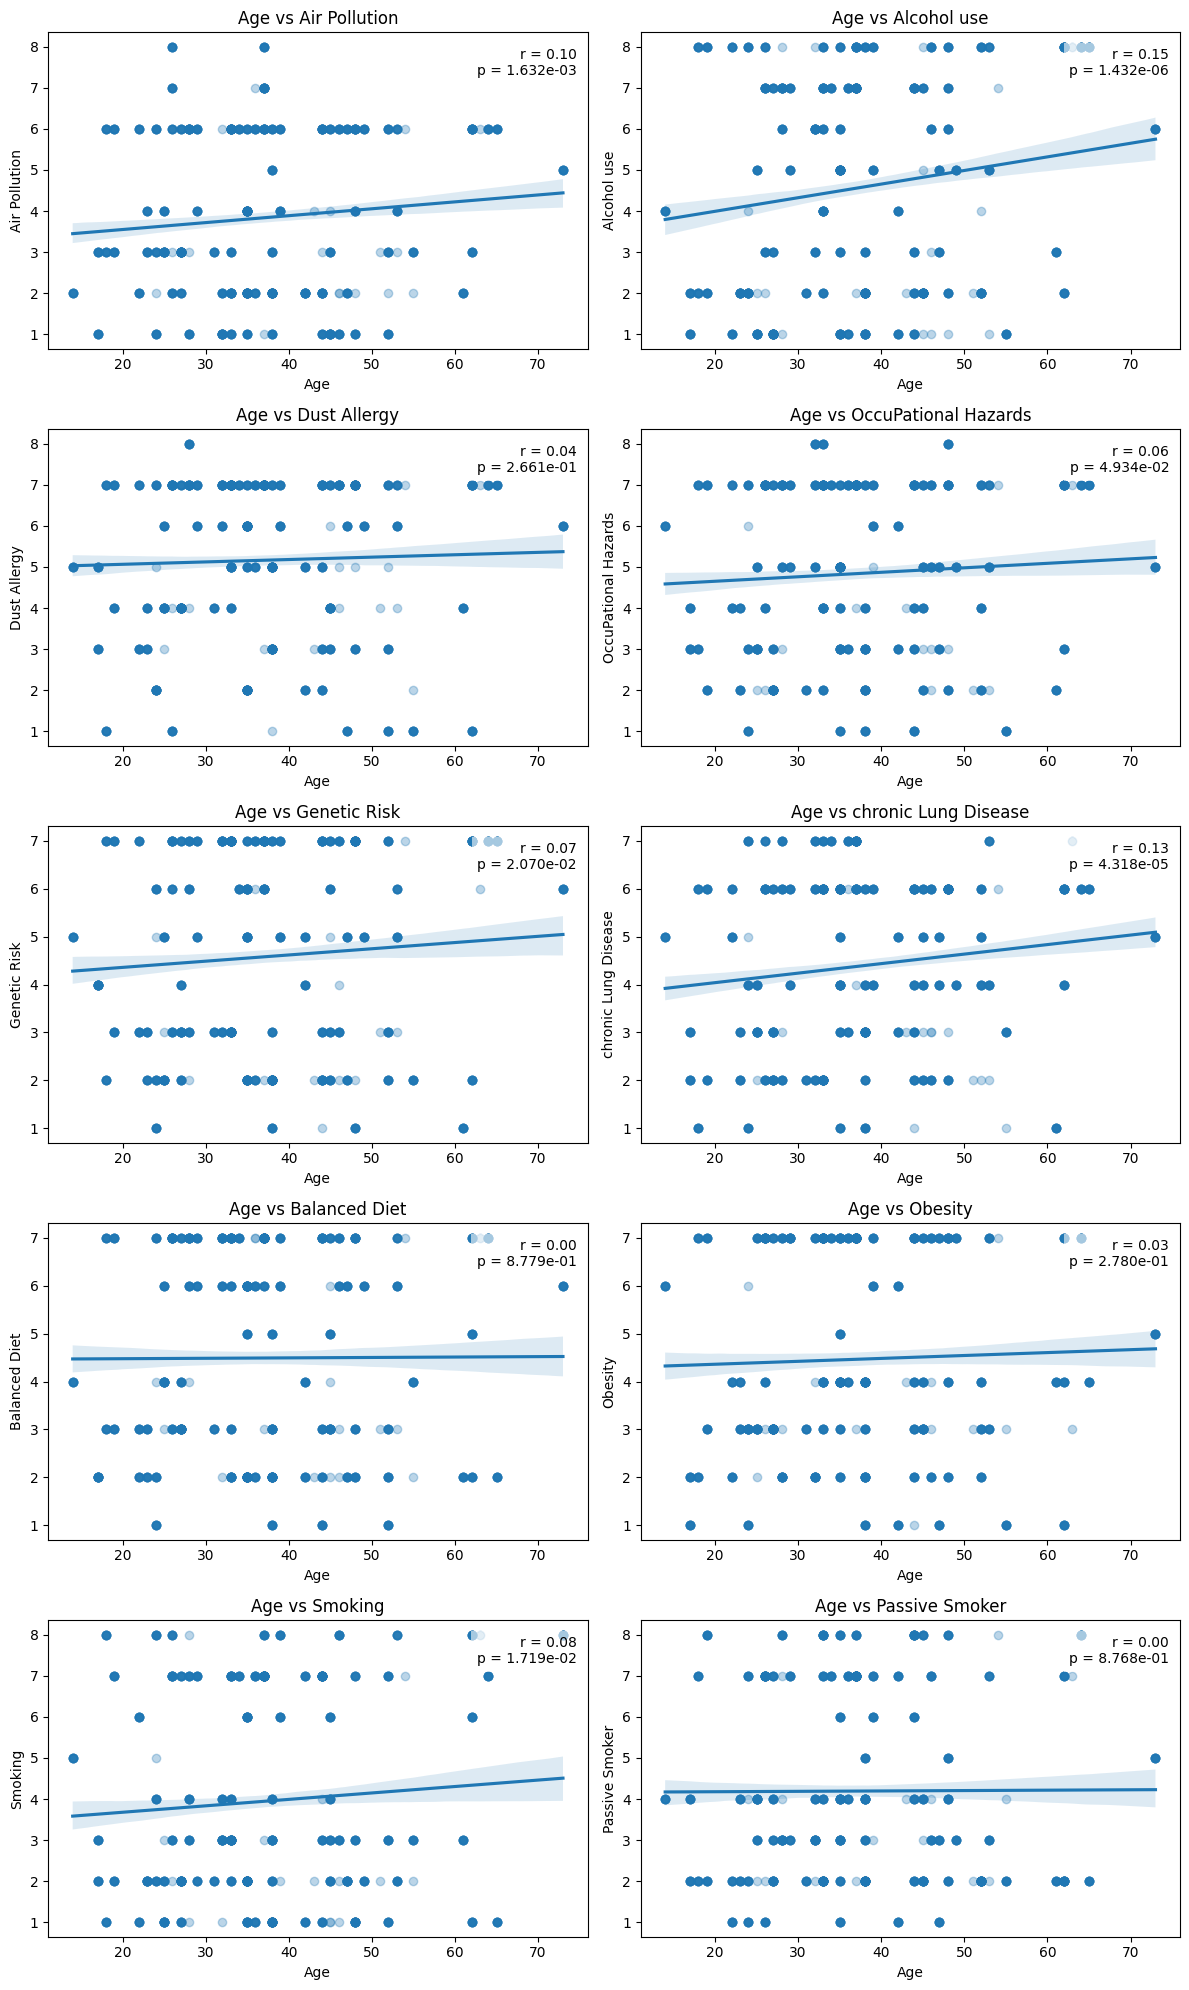

In [ ]:
#Compute linear regressions between Age and other risk factors to check for corelations

risk_factors = ['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk','chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker' ]

n = len(risk_factors)
cols = 2
rows = (n + 1) // cols

plt.figure(figsize=(12, rows * 4))

for i, rf in enumerate(risk_factors, 1):
    plt.subplot(rows, cols, i)
    sns.regplot(data=cancer_df, x="Age", y=rf, scatter_kws={'alpha': 0.3})
    r, p = stats.pearsonr(cancer_df["Age"].dropna(), cancer_df[rf].dropna())
    plt.text(
        0.98, 0.95,              # x, y in axis coordinates (0 to 1)
        f"r = {r:.2f}\np = {p:.3e}",
        ha='right', va='top',
        transform=plt.gca().transAxes,
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none')
    )
    plt.title(f"Age vs {rf}")

plt.tight_layout()
plt.show()

#**Machine Learning**


In [ ]:
# Split dataset in features and target variable
feature_cols = [
    'Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
    'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
    'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
    'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
    'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
    'Frequent Cold', 'Dry Cough', 'Snoring'
]

X = cancer_df[feature_cols]   # Features
y = cancer_df['level_numeric'] # Target Variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 70% training and 30% test

# 5-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1) #Have to stratify to preserve proportions of low, med, high 'level'

##**Logistic Regression Model**

Logistic Regression Model
Accuracy of : 0.9966666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        91
           1       0.99      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Cross-validation scores: [0.995 1.    1.    1.    0.995]
Mean accuracy: 0.998


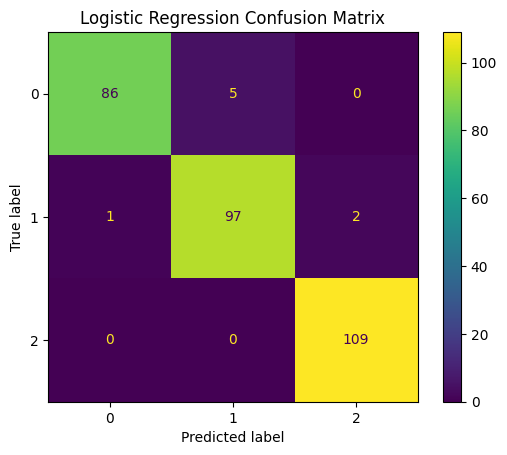

In [ ]:
print("Logistic Regression Model")

# Create Logistic Regression Model Pipeline
log_reg = Pipeline([
  ("scaler", StandardScaler()),
  ("clf", LogisticRegression(
      max_iter=1000,
      solver='liblinear',  # good for small datasets
      penalty='l1',
      C=10
  ))
])

"""
### Code for Hyperparameter Tuning

log_param_grid = {
    "clf__C": [0.01, 0.1, 1, 10, 100],
    "clf__penalty": ["l1", "l2"]
}

log_grid = GridSearchCV(
    estimator=log_reg_pipe,
    param_grid=log_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
"""

# Train the model
log_reg.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = log_reg.predict(X_test)

# Test Accuracy
print("Accuracy of :", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Perform 5-fold cross-validation
scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

# Display Confusion Matrix
log_reg_pred = cross_val_predict(log_reg, X_test, y_test, cv=5)
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_pred)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

##**K-Nearest-Neighbors Model**


K-Nearest-Neighbors Model
KNN Accuracy : 1.0
KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

KNN Cross-validation scores: [1. 1. 1. 1. 1.]
KNN Mean accuracy: 1.0


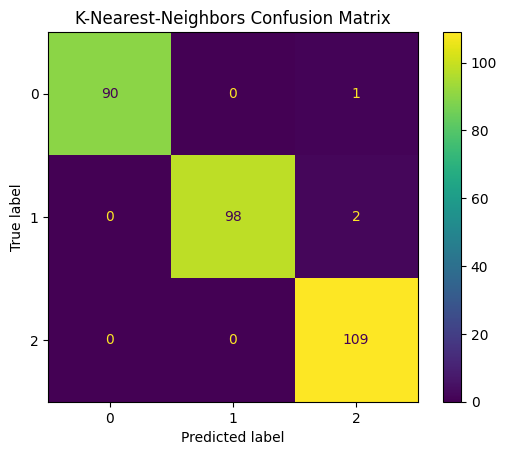

In [ ]:
print("K-Nearest-Neighbors Model")

# Create KNN Model Pipeline
knn_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(
        n_neighbors=3,
        weights='distance',
        p=1   # Manhattan distance
    ))
])

"""
### Code for Hyperparameter Tuning

knn_param_grid = {
    "clf__n_neighbors": [3, 5, 7, 9, 11, 13, 15],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2]   # 1 = Manhattan, 2 = Euclidean
}

knn_grid = GridSearchCV(
    estimator=knn_pipe,
    param_grid=knn_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
"""

# Train the model
knn_clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_knn = knn_clf.predict(X_test)

# Test Accuracy
print("KNN Accuracy :", metrics.accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Perform 5-fold cross-validation
knn_scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("KNN Cross-validation scores:", knn_scores)
print("KNN Mean accuracy:", knn_scores.mean())

# Display Confusion Matrix
knn_clf_pred = cross_val_predict(knn_clf, X_test, y_test, cv=5)
ConfusionMatrixDisplay.from_predictions(y_test, knn_clf_pred)
plt.title("K-Nearest-Neighbors Confusion Matrix")
plt.show()

##**Random Forest Model**

Random Forest Model
Random Forest Accuracy : 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       100
           2       1.00      1.00      1.00       109

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Random Forest Cross-validation scores: [1. 1. 1. 1. 1.]
Random Forest Mean accuracy: 1.0


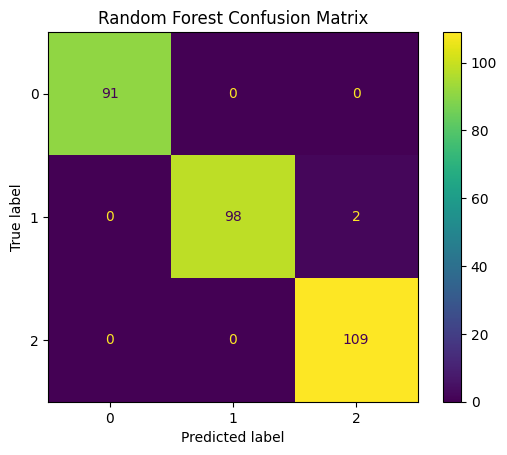

In [ ]:
print("Random Forest Model")

# Create Random Forest Model Pipeline
rf_clf = Pipeline([
    ("clf", RandomForestClassifier(
        n_estimators=100,
        max_depth=None,
        max_features='sqrt',
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=1
    ))
])


"""
### Code for Hyperparameter Tuning

rf_param_grid = {
    "clf__n_estimators": [100, 200, 300],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 4],
    "clf__max_features": ["sqrt", "log2", None]
}

rf_grid = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)
"""


# Train the model
rf_clf.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred_rf = rf_clf.predict(X_test)

# Test Accuracy
print("Random Forest Accuracy :", metrics.accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Perform 5-fold cross-validation
rf_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores and mean accuracy
print("Random Forest Cross-validation scores:", rf_scores)
print("Random Forest Mean accuracy:", rf_scores.mean())

# Display Confusion Matrix
rf_clf_pred = cross_val_predict(rf_clf, X_test, y_test, cv=5)
ConfusionMatrixDisplay.from_predictions(y_test, rf_clf_pred)
plt.title("Random Forest Confusion Matrix")
plt.show()